(lca)=
# Ökobilanzierung

:::{admonition} **Lernziele**
- Umweltwirkungen kennen und unterscheiden
- mithilfe von Datenbanken und Normen zur Ökobilanzierung
- um Daten aus Ökobilanzen kritisch bewerten zu können
:::

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import flow
import shutil

print('Versionen der verwendeten python-Module: ')
print('matplotlib', matplotlib.__version__)
print('schemdraw', schemdraw.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
matplotlib 3.9.2
schemdraw 0.19
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if shutil.which('latex'): plt.rcParams['text.usetex'] = True

## Umweltwirkungen vergleichen

:::{figure-md} ressourceeta
<img src="../img/ressourceeta.png" width="70%">

Ressourceneffizienz wozu
:::

Abbildung nach VDI 4800 Blatt 1

- Ist es besser Wald für Bio-Landbau abzuholzen als intensive Landwirtschaft auf einer kleinen Fläche zu betreiben?
- Ist es besser, Wasser oder Luft zu verschmutzen und wie sehr?
- Wie wirken sich unterschiedliche Faktoren auf das Klima aus?
- Was bleibt, auch nach Recycling und Renaturierung?
- Ist es besser, ein altes Produkt weiter zu nutzen oder ein neues herzustellen, das energieeffizienter ist und damit zu arbeiten?

Meist sind mehrere dieser Ziele gleich oder ähnlich wichtig und wir brauchen die Einhaltung verschiedener planetarer Grenzen. {cite:p}`oneill_good_2018` haben [visuelle Darstellungen des ökologischen Fußabdrucks für verschiedene Länder](https://goodlife.leeds.ac.uk/countries/) erarbeitet, die die Aspekte $\text{CO}_2$-Emissionen, Phosphor, Stickstoff, Wasser, Landnutzungsänderung, Ökologischer Fußabdruck sowie Materialabdruck enthalten. Sie vergleichen dabei einen **sozialen Grundbedarf** und stellen dies mit der **ökologischen Grenze** in Zusammenhang. Die Seite ist interaktiv und erlaubt auch den Download der zugrundeliegenden Daten.

## Lebenszyklusanalyse

### Vorgehensweise nach ISO 14044

:::{figure-md} lca
<img src="../img/lca.png" width="70%">

Vorgehensweise bei der Ökobilanzierung
:::

### Zeitlicher Rahmen

**Cradle to gate**: "von der Wiege bis zum Fabriktor" - von der Rohstoffherstellung bis zum fertigen Produkt ab Werk

**Cradle to grave**: "von der Wiege bis zur Bahre" - von der Rohstoffherstellung bis zur Entsorgung

**Cradle to cradle**: "von der Wiege bis zur Wiege" - von der Rohstoffherstellung bis zur (erneuten) Herstellung

### Systemgrenzen

- Darf CO$_2$ anderweitig kompensiert werden (und somit in der Bilanz weniger zählen)?
- Wie ist eine Umnutzung in einer weiteren Anwendung zu bewerten?
- Welche Umnutzungen (Recycling, Umbau, Weiternutzung, Reparatur) sind in der Analyse enthalten, welche nicht?
- etc.

### Indikatoren

Es existieren eine Reihe von Standards, die mehr oder weniger detailliert vorschreiben, wie eine Umweltwirkung zu ermitteln ist.

Die meisten Indikatoren fokussieren auf Rohstoffe {cite:p}`giegrich_konzeption_2016`
- Rohöläquivalente
- CML (71 Metalle und fossile Energieträger)
- ReCiPe mineral resource depletion and fossil ressource depletion
- IMPACT2002+ (Eco-Indicator 99-Faktoren)
- KRA kumulierter Rohstoffaufwand
- MIPS Materialinput pro Serviceeinheit
- **KEA / KEV kumulierter Energieaufwand bzw. -verbrauch**
- CEENE (cumulative exergy extraction from the natural environment)
- GWP (global warming potential)
- und viele weitere - z. B. **Wasserfussabdruck** und **Landnutzung**

:::{admonition} **AUFGABE**
Wie ist der ökologische Aufwand für Ihre Projekte (Geräte und Nutzung) zu bewerten?
:::

*Antwort: ...*

### Ökobilanz-Label?

Vorschläge von {cite:p}`giegrich_konzeption_2016` und {cite:p}`edward_langley_research_2012`: 
- CO$_2$-Fußabdruck
- Herstellungsenergie
- Landnutzung
- Wasserfußabdruck
- Ressourcenverbrauch
- Wasserverschmutzung

![Energielabel-Vorschlag mit mehr Infos](../img/energielabel_mit_legende.svg)

:::{admonition} **AUFGABE**
Was halten Sie von dem Vorschlag? Denken Sie, Verbraucher könnten den hilfreich finden? Ist das vertrauenswürdig?
:::

*Antwort:...*

:::{admonition} **AUFGABE**
Welche Genauigkeit und Varianz erwarten Sie bei diesen Daten? Warum?
:::

*Antwort:...*

### Zirkularität: 10R berücksichtigen

{cite:p}`alvarez-risco_towards_2022` zeigt auf, was Zirkularität meint: 10 verschiedene englischsprachige Begriffe, die alle mit *r* beginnen (deshalb *10R*) beschreiben, was alles möglich ist, um den Ressourcenbedarf aus neu dem Planeten entnommenen Material zu reduzieren. Dass das reichlich komplizierte Materialflüsse werden, wenn man die verschiedenen Akteure aufzeigt, zeigt das folgende Diagramm:

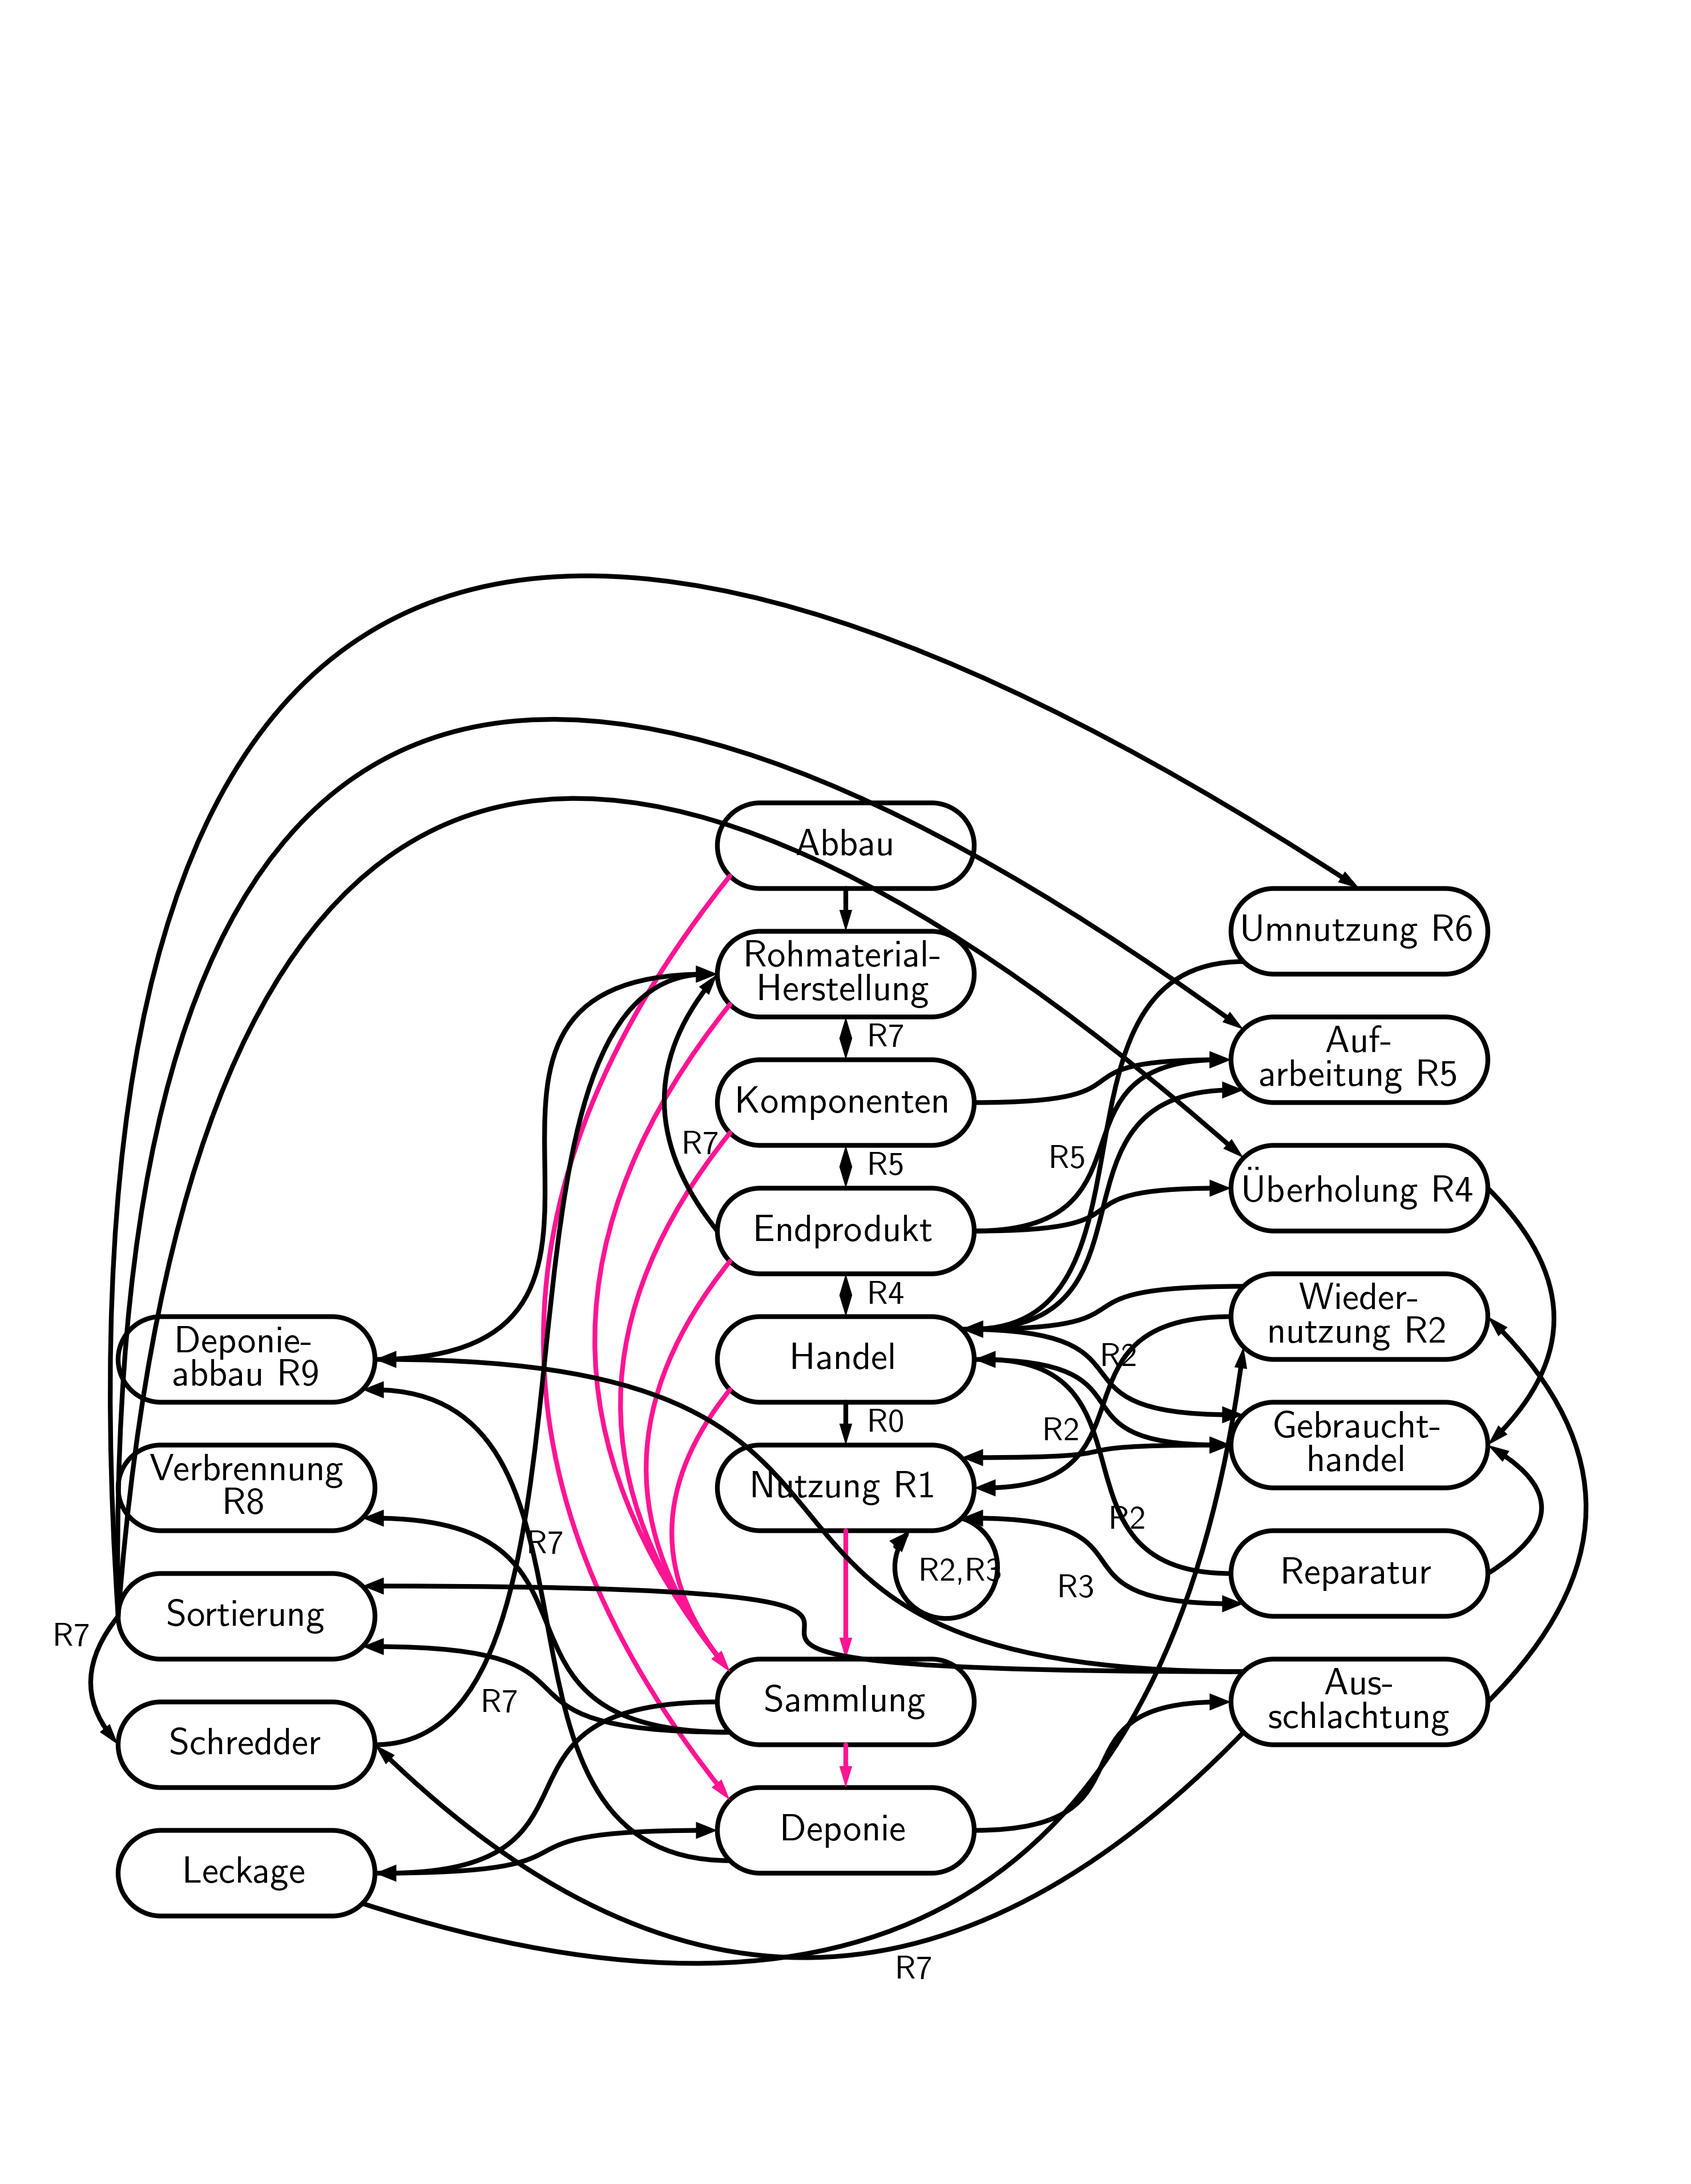

In [3]:
schemdraw.config(lw=2, font='serif')
with schemdraw.Drawing() as d:
    d.config(fontsize=16)
    d += (b1 := flow.Start(w=3, h=1).label('Abbau').color('black'))
    d += (b2 := flow.Terminal(w=3, h=1).label('Rohmaterial-\nHerstellung').at((0, -1.5)).color('black'))
    d += (b3 := flow.Terminal(w=3, h=1).label('Komponenten').at((0, -3)).color('black'))
    d += (b4 := flow.Terminal(w=3, h=1).label('Endprodukt').at((0, -4.5)).color('black'))
    d += (b5 := flow.Terminal(w=3, h=1).label('Handel').at((0, -6)).color('black'))
    d += (b6 := flow.Terminal(w=3, h=1).label('Nutzung R1').at((0, -7.5)).color('black'))
    d += (b7 := flow.Terminal(w=3, h=1).label('Sammlung').at((0, -10)).color('black'))
    d += (b8 := flow.Terminal(w=3, h=1).label('Deponie').at((0, -11.5)).color('black'))
    d += (b9 := flow.Terminal(w=3, h=1).label('Umnutzung R6').at((6, -1)).color('black'))
    #d += (b10 := flow.Terminal(w=3, h=1).label('Frischwasser').at((-7, -1.5)).color('black'))
    d += (b11 := flow.Terminal(w=3, h=1).label('Auf-\narbeitung R5').at((6, -2.5)).color('black'))
    d += (b12 := flow.Terminal(w=3, h=1).label('Schredder').at((-7, -10.5)).color('black'))
    #d += (b13 := flow.Terminal(w=3, h=1).label('Energie-\nversorgung').at((-7, -3)).color('black'))
    d += (b14 := flow.Terminal(w=3, h=1).label('Deponie-\nabbau R9').at((-7, -6)).color('black'))
    d += (b15 := flow.Terminal(w=3, h=1).label('Überholung R4').at((6, -4)).color('black'))
    d += (b16 := flow.Terminal(w=3, h=1).label('Wieder-\nnutzung R2').at((6, -5.5)).color('black'))
    d += (b17 := flow.Terminal(w=3, h=1).label('Gebraucht-\nhandel').at((6, -7)).color('black'))
    d += (b18 := flow.Terminal(w=3, h=1).label('Verbrennung \nR8').at((-7, -7.5)).color('black'))
    d += (b19 := flow.Terminal(w=3, h=1).label('Reparatur').at((6, -8.5)).color('black'))
    d += (b20 := flow.Terminal(w=3, h=1).label('Sortierung').at((-7, -9)).color('black'))
    d += (b21 := flow.Terminal(w=3, h=1).label('Leckage').at((-7, -12)).color('black'))
    d += (b22 := flow.Terminal(w=3, h=1).label('Aus-\nschlachtung').at((6, -10)).color('black'))
    
    d += flow.Arc2(k=-.4,arrow='->').at(b1.SW).to(b8.NW).color('deeppink').label('')
    d += flow.Arc2(k=-.4,arrow='->').at(b2.SW).to(b7.NW).color('deeppink').label('')
    d += flow.Arc2(k=-.4,arrow='->').at(b3.SW).to(b7.NW).color('deeppink').label('')
    d += flow.Arc2(k=-.4,arrow='->').at(b4.SW).to(b7.NW).color('deeppink').label('')
    d += flow.Arc2(k=-.4,arrow='->').at(b5.SW).to(b7.NW).color('deeppink').label('')
    d += flow.Arc2(k=0,arrow='->').at(b6.S).to(b7.N).color('deeppink').label('')
    d += flow.Arc2(k=0,arrow='->').at(b7.S).to(b8.N).color('deeppink').label('')
    
    d += flow.Arc2(k=0,arrow='->').at(b5.S).to(b6.N).color('black').label('R0',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b5.NE).to(b17.NW).color('black').label('R2',ofst=(0,0))
    d += flow.ArcZ(arrow='<->').at(b6.NE).to(b17.W).color('black').label('R2',ofst=(-.6,.4))
    d += flow.ArcZ(arrow='<-').at(b5.E).to(b19.W).color('black').label('R2',ofst=(.1,-.8))
    d += flow.ArcZ(arrow='<->').at(b6.SE).to(b19.SW).color('black').label('R3',ofst=(-.5,-.5))
    d += flow.Arc2(k=0,arrow='<->').at(b5.N).to(b4.S).color('black').label('R4',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b4.E).to(b11.W).color('black').label('R5',ofst=(-.6,0))
    d += flow.Arc2(k=-.4,arrow='->').at(b20.W).to(b12.W).color('black').label('R7',ofst=(0,.5))
    #d += flow.Arc2(k=.4,arrow='->').at(b21.SSW).to(b12.E).color('black').label('R7',ofst=(0,.5))
    d += flow.Arc2(k=0,arrow='->').at(b1.S).to(b2.N).color('black').label('',ofst=(0,.5))
    d += flow.ArcZ(k=1,arrow='->').at(b14.E).to(b2.W).color('black').label('',ofst=(0,.5))
    d += flow.Arc2(k=0,arrow='<->').at(b2.S).to(b3.N).color('black').label('R7',ofst=(.5,0))
    d += flow.Arc2(k=-.4,arrow='<-').at(b2.W).to(b4.W).color('black').label('R7',ofst=(.65,-.5))
    d += flow.ArcZ(arrow='->').at(b12.E).to(b2.W).color('black').label('R7',ofst=(-.2,-2))
    d += flow.Arc2(k=0,arrow='<->').at(b3.S).to(b4.N).color('black').label('R5',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b3.E).to(b11.W).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b4.E).to(b15.W).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b16.NW).to(b5.NE).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b9.SW).to(b5.NE).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='<->').at(b11.SW).to(b5.NE).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b5.E).to(b17.W).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b16.W).to(b6.E).color('black').label('',ofst=(.5,0))
    d += flow.ArcLoop(arrow='->').at(b6.SE).to(b6.SSE).color('black').label('R2,R3',ofst=(-.4,.7))
    d += flow.ArcZ(arrow='->').at(b7.SW).to(b18.SE).color('black').label('',ofst=(.5,0))
    #d += flow.ArcZ(arrow='->').at(b7.SW).to(b20.SE).color('blue').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b7.W).to(b21.E).color('black').label('',ofst=(.5,0))
    d += flow.ArcZ(arrow='->').at(b7.SW).to(b20.SE).color('black').label('R7',ofst=(-.3,0))
    d += flow.ArcZ(arrow='->').at(b8.E).to(b22.W).color('black').label('',ofst=(-.3,0))
    d += flow.ArcZ(arrow='->').at(b21.E).to(b8.W).color('black').label('',ofst=(-.3,0))
    d += flow.ArcZ(arrow='->').at(b8.SW).to(b14.SE).color('black').label('',ofst=(-.3,0))
    d += flow.Arc2(k=-.6,arrow='->').at(b21.SE).to(b16.SW).color('black').label('',ofst=(-.3,0))
    d += flow.Arc2(k=-.5,arrow='->').at(b22.E).to(b16.E).color('black').label('',ofst=(-.3,0))
    d += flow.ArcZ(k=1,arrow='->').at(b22.NW).to(b20.NE).color('black').label('',ofst=(-.3,0))
    d += flow.ArcZ(k=.7,arrow='->').at(b22.NW).to(b14.E).color('black').label('',ofst=(-.3,0))
    d += flow.Arc2(arrow='->').at(b22.SW).to(b12.E).color('black').label('R7',ofst=(1,0))
    d += flow.Arc2(k=1,arrow='->').at(b20.W).to(b9.N).color('black').label('',ofst=(1,0))
    d += flow.Arc2(k=1,arrow='->').at(b20.W).to(b11.NW).color('black').label('',ofst=(1,0))
    d += flow.Arc2(k=1,arrow='->').at(b20.W).to(b15.NW).color('black').label('',ofst=(1,0))
    d += flow.Arc2(arrow='->').at(b15.E).to(b17.E).color('black').label('',ofst=(1,0))
    d += flow.Arc2(k=-.8,arrow='->').at(b19.E).to(b17.E).color('black').label('',ofst=(1,0))
    
plt.show()

Aktuell sind Normungsgremien und Wissenschaft dabei, die verschiedenen Begriffe genauer zu definieren. Es kann daher sein, dass Sie diese Auflistung woanders mit etwas anderer Definition finden. 

| **R0 $\to$ R10** | **englisch** nach {cite:p}`alvarez-risco_towards_2022` | **deutsch** | **Beispiel im Energiebereich** |
|---|---|---|---|
| R0 | refuse | vermeiden | keine Straßenlampen auf dem Acker einsetzen |
| R1 | reduce | reduzieren | weniger Straßenlampen leuchten lassen |
| R2 | resell, reuse | wieder nutzen | Studentin nutzt elterliche Waschmaschine weiter |
| R3 | repair | reparieren | Akku eines Laptops tauschen |
| R4 | refurbish | überholen | Kühlschrank abtauen, Lüfter reinigen, Dichtung tauschen |
| R5 | remanufacture | aufarbeiten | Kühlschrank-Elektronik Lötstellen nachlöten |
| R6 | repurpose | umnutzen | Autobatterie in Solarheimspeicher weiter verwenden |
| R7 | recycle | recyclen | Solarmodule schreddern, einschmelzen, Glas reinigen, erneut einsetzen |
| R8 | recover energy | energetisch verwerten | Rückseitenfolie der Solarmodule verbrennen, Abwärme = Fernwärme |
| R9 | re-mine | erneut abbauen (aus der Deponie) | idealerweise kontrolliertes urban mining |

**Die 10R geben eine Hierarchie wieder: es ist in der Regel ökologischer, R0 umzusetzen als R1 und ökologischer R1 umzusetzen als R2, etc.**

:::{tip}
Photovoltaikmodule werden - wenn sie einen mechanisch guten Eindruck machen - erst elektrisch getestet, um sie für eine Zweitnutzung freizugeben. Wenn das nicht der Fall ist, zerlegt der Recycling-Prozess sie in ihre Bestandteile, wie das [Video](https://www.youtube.com/watch?v=l6PE6yzpwbw) zeigt. 
:::

In der Umsetzung der 10R sind heute viele Probleme zu finden, die dazu führen, dass viel weniger verwertet wird als eigentlich möglich wäre: 
- So ist z. B. erst im neuen ElektroG geplant, dass nur geschultes Fachpersonal auf kommunalen Wertstoffhöfen Altgeräte annehmen darf. Dadurch erhofft man sich, zukünftig dass seltener batteriehaltige Geräte in die falschen Abfallströme gelangen und dort zu Bränden führen. Damit erreicht man allerdings noch nicht kleine batteriehaltige Geräte (z. B. Einweg-E-Zigaretten), die in beliebigen Mülltonnen landen. Die Brände gefährden die (wirtschaftliche) Existenz vieler Recyclinganlagen {cite:p}`bvse__bundesverband_sekundarrohstoffe_und_entsorgung_ev_elektrog-novelle_2024` - und sorgen dafür, dass selbst korrekt sortierte Abfälle ungewollt verbrennen und dadurch für das Recycling wegfallen. 

## Ökobilanzen vergleichen

### Unterschiedliche Randbedingungen und Datenbasis

Unterschiedliche Studien haben unterschiedliche Schwerpunkte. Sie unterscheiden sich bei Systemgrenzen, zeitlichem Rahmen und gewichtigen Annahmen. Daher sind in verschiedenen Quellen unterschiedliche Bewertungen der Umweltwirkung zu finden.

Die Klimawirkung ist aufgrund des Klimawandels sehr präsent. Hierfür sind die Ökobilanz-Datenbanken am besten mit Daten ausgestattet. Schlechter mit Daten hinterlegte Umweltwirkungen lassen sich wegen der höheren Unsicherheiten auch schlechter vergleichen.

{cite:p}`hertwich_integrated_2015` vergleicht die Stromerzeugung Photovoltaik, Windkraft, Wasserkraft, solarthermische Kraftwerke, Kohle und Gas hinsichtlich der verschiedenen Umweltwirkungen: 

![Umweltwirkungen der Stromerzeugung in einer norwegischen Studie](https://www.pnas.org/cms/10.1073/pnas.1312753111/asset/40b8a5df-adf6-45e2-85bd-f9aa9655d9bb/assets/graphic/pnas.1312753111fig01.jpeg)

Bezüglich vieler Umweltwirkungen schneidet Photovoltaik besser ab als Kohle, jedoch nicht überall. Beispielsweise ist der Kupferbedarf recht hoch. Dies bedeutet, dass auch erneuerbare Energie *nicht unendlich* verfügbar ist, sondern dass auch damit effizient umgegangen werden muss. 

### Ökobilanzen anderer plausibilisieren

Im Modul Systemtechnik für Energieeffizienz sollen Sie in der Projektaufgabe auch Daten zum Energieaufwand bzw. zur Klimawirkung der Herstellungs- und Entsorgungsphasen recherchieren. Diese Ökobilanzen selbst zu erstellen ist im Rahmen des Moduls zu aufwendig. Daher ist es nötig, die gefundenen Daten zu plausibilisieren.

Eine Möglichkeit, dies zu tun, ist, mehrere Quellen zu finden. So ergibt sich zumindest ein Wertebereich.

### Ökobilanzen selbst erstellen

... ist, wenn man wirklich alle Annahmen auch gut belegen und hinterfragen können will, recht schnell sehr aufwendig. Allein die Anzahl der Materialien in einem Gerät ist so hoch, dass man da länger beschäftigt ist, um den Rohstoffabbau sinnvoll zu beschreiben. Hinzu kommen dann die Herstellungsprozesse, ggf. in mehreren Schritten, Transport, Vermarktung, etc.

Etwas leichter wird es, wenn man Software dafür benutzt. Kostenfrei und open source ist [openLCA](https://www.openlca.org/). Die im nächsten Abschnitt dargestellten Datenbanken lassen sich zum Teil dort importieren und so kann man mit den hinterlegten Daten eigene Bilanzen erstellen. Zudem kann man - wie auch bei kommerziellen LCA-Werkzeugen - kostenpflichtige Datenbanken wie [ecoinvent](https://ecoinvent.org/) integrieren.

Weitere kommerzielle Software-Werkzeuge für LCA sind [GaBi ts](https://gabi.sphera.com/international/index/), [SimaPro](https://simapro.com/), [Mobius](https://ecochain.com/solutions/product-environmental-footprint/), [oneclickLCA (nur für Bauindustrie)](https://www.oneclicklca.com/) und [ecochain](https://ecochain.com/).

### Kostenfrei zugängliche Datenbanken

| **Name** | **Fokus** | **Link** |
|---|---|---|
| **3EID** | japanische Materialien und Produkte | https://www.cger.nies.go.jp/publications/report/d031/eng/page/document_file.htm |
| **Agribalyse** | Essen und Landwirtschaft | https://nexus.openlca.org/database/Agribalyse |
| **Ag Data Commons** | Landwirtschaft in USA | https://data.nal.usda.gov/life-cycle-assessment |
| **AusLCI** | Australische Datensätze | http://www.auslci.com.au/ | |
| **BEAT** | Biomasse | https://www.forestresearch.gov.uk/tools-and-resources/fthr/biomass-energy-resources/reference-biomass/documents-downloads/beat/ |
| **Bilan Carbone** | GWP von Materialien und Produkten | https://ghgprotocol.org/Third-Party-Databases/Bilan-Carbone |
| **Bioenergiedat** | Bioenergie | https://nexus.openlca.org/database/bioenergiedat |
| **BUWAL** | Verpackungen | https://ghgprotocol.org/Third-Party-Databases/BUWAL |
| **Canadian Raw Materials Database** | Kanadische Rohstoffe | https://ghgprotocol.org/Third-Party-Databases/Canadian-Raw-Materials-Database |
| **CCaLC** | industrielle Prozesse | https://ghgprotocol.org/third-party-databases/CCaLC |
| **Carnegie Mellon** | Verpackungen | https://ghgprotocol.org/Third-Party-Databases/Carnegie-Mellon |
| **CEDA Factors** | Faktoren für Ökobilanzen | https://ghgprotocol.org/Third-Party-Databases/CEDA |
| **Cepi** | Pappe | https://www.cepi-containerboard.org/download.php | |
| **CGA** | Glas | https://ghgprotocol.org/Third-Party-Databases/European-CGA |
| **CPM Chalmers** | Suchmaske für Ökobilanz-Daten | http://cpmdatabase.cpm.chalmers.se/ |
| **Defra** | Konversionsfaktoren | https://ghgprotocol.org/Third-Party-Databases/Defra |
| **EAA** | Aluminium | https://ghgprotocol.org/Third-Party-Databases/EAA |
| **Embodied Carbon Footprint - ICE Database** | Gebäude-Materialien | https://circularecology.com/embodied-carbon-footprint-database.html |
| **EPD** | Umwelt-Produkt-Deklarationen | https://ghgprotocol.org/Third-Party-Databases/EPD |
| **EPLCA** | europäische LCA Plattform | https://eplca.jrc.ec.europa.eu/ |
| **Evah OzLCI2019** | Australische und asiatische Fußabdrücke für viele Materialien | https://nexus.openlca.org/database/OzLCI2019 |
| **exiobase** | Materialien und Nutzung in verschiedenen Regionen | https://nexus.openlca.org/database/exiobase |
| **GEMIS** | Energie, Material, Produkte | https://ghgprotocol.org/Third-Party-Databases/GEMIS |
| **GHG Protocol** | Klimawirkungen | https://ghgprotocol.org/Third-Party-Databases/GHG-Protocol |
| **GLAD** | weltweit Ökobilanz-Daten suchen | https://www.globallcadataaccess.org/search |
| **GREET** | Klimawirkung amerikanischer Transporte | https://ghgprotocol.org/Third-Party-Databases/GREET |
| **IDEA** | japanische Rohstoffe und Produkte (Klimawirkung) | https://ghgprotocol.org/third-party-databases/IDEA |
| **IEA GHG Programme** | Klimawirkung von Energieträgern | https://ghgprotocol.org/Third-Party-Databases/IEA-GHG-Programme |
| **IISI** | Stahl | https://ghgprotocol.org/Third-Party-Databases/IISI |
| **Impact World+** | Methoden zur räumlichen Unterscheidung von Effekten (z. B. Unterscheidung wasserarmer und wasserreicher Regionen oder der Bevölkerungsdichte) | https://nexus.openlca.org/database/IMPACT%20World%2B |
| **IPCC** | Emissionsfaktoren | https://ghgprotocol.org/Third-Party-Databases/IPCC-Emissions-Factor-Database |
| **ISSF** | rostfreier Stahl | https://ghgprotocol.org/Third-Party-Databases/ISSF |
| **ITRI** | Zinn | https://ghgprotocol.org/Third-Party-Databases/ITRI |
| **IZA** | Zink | https://ghgprotocol.org/Third-Party-Databases/IZA |
| **LCDN** | Europäische Sammlung von Ökobilanz-Daten | https://eplca.jrc.ec.europa.eu/LCDN/index.xhtml?stock=default |
| **Needs** | Materialien für die zukünftige Energieversorgung | https://nexus.openlca.org/database/NEEDS |
| **ÖKOBAUDAT** | Baumaterialien | https://www.oekobaudat.de/ |
| **openLCA** | 40 Bewertungsmethoden für Ökobilanzen | https://nexus.openlca.org/database/openLCA%20LCIA%20methods |
| **PEF Database** | Produkt-Fußabdrücke für unterschiedliche Umweltwirkungen in der EU | https://nexus.openlca.org/database/Environmental%20Footprints |
| **ProBas** | Prozessdaten | https://ghgprotocol.org/Third-Party-Databases/ProBas |
| **Samsung Mobile** | Mobilgeräte von Samsung | https://images.samsung.com/is/content/samsung/p5/ve/dd/environment/files/2018_Life_Cycle_Assessment_for_Mobile_Phones_180622.pdf |
| **Supply Chain Greenhouse** | amerikanische Lieferketten-Emissionen | https://edg.epa.gov/metadata/catalog/search/resource/details.page?uuid=https://doi.org/10.23719/1517796 |
| **U.S. Life Cycle Inventory Database** | amerikanische Daten | https://www.nrel.gov/lci/ |

### Beispiele für Studien mit Lebenszyklusdaten

| **Autor** | **Beschreibung** | **Link** | **Quelle** |
|-|-|-|-|
| Fichter et al 2020 | Übersicht über Energie- und Materialaufwand für Bürocomputer | https://www.borderstep.de/wp-content/uploads/2011/06/RessourceneffizienteArbeitsplatzComputer_druck.pdf | {cite:p}`klaus_fichter_roadmap_2011` |
| Manhart et al 2016 | Ressourceneffizienz von Tablets und Smartphones | https://www.greenpeace.de/sites/www.greenpeace.de/files/publications/20161109_oeko_resource_efficency_final_full-report.pdf | {cite:p}`andreas_manhart_resource_2016`|
| Prakash et al 2012 | Umfangreiche Studie über die Ressourceneffizienz von IT | https://ec.europa.eu/digital-single-market/en/news/study-practical-application-new-framework-methodology-measuring-environmental-impact-ict | {cite:p}`siddharth_prakash_study_2014`|
| Prakash et al 2016 | Effekt der Nutzungsdauer auf die Umweltwirkungen von IT | https://www.umweltbundesamt.de/sites/default/files/medien/378/publikationen/texte_11_2016_einfluss_der_nutzungsdauer_von_produkten_obsoleszenz.pdf | {cite:p}`prakash_einfluss_2016` |
| Dong et al 2021 | Treibhausgase aus Klimaanlagen in Entwicklungsländern | https://www.annualreviews.org/doi/pdf/10.1146/annurev-environ-012220-034103 | {cite:p}`dong_greenhouse_2021` |

:::{bibliography}
:filter: docname in docnames
:::